In [ ]:
! pip install -q kaggle


In [ ]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"rajathsingh3","key":"ff100dc841dc9f2bbc377a6929c9e9b7"}'}

In [ ]:
! mkdir ~/.kaggle
! cp kaggle.json ~/.kaggle/

In [ ]:
! chmod 600 ~/.kaggle/kaggle.json

In [ ]:
! kaggle datasets list


ref                                                         title                                              size  lastUpdated          downloadCount  
----------------------------------------------------------  ------------------------------------------------  -----  -------------------  -------------  
gpreda/reddit-vaccine-myths                                 Reddit Vaccine Myths                              233KB  2021-08-20 08:51:07          10969  
crowww/a-large-scale-fish-dataset                           A Large Scale Fish Dataset                          3GB  2021-04-28 17:03:01           6710  
imsparsh/musicnet-dataset                                   MusicNet Dataset                                   22GB  2021-02-18 14:12:19           2538  
dhruvildave/wikibooks-dataset                               Wikibooks Dataset                                   2GB  2021-07-03 18:37:20           2687  
promptcloud/careerbuilder-job-listing-2020                  Careerbuilder Jo

In [ ]:
!kaggle datasets download -d ttungl/adience-benchmark-gender-and-age-classification

 99% 1.38G/1.39G [00:12<00:00, 155MB/s]
100% 1.39G/1.39G [00:12<00:00, 118MB/s]


In [ ]:
! unzip adience-benchmark-gender-and-age-classification

Streaming output truncated to the last 5000 lines.
  inflating: AdienceBenchmarkGenderAndAgeClassification/faces/7651777@N03/coarse_tilt_aligned_face.1590.8448553152_ee57286766_o.jpg  
  inflating: AdienceBenchmarkGenderAndAgeClassification/faces/7651777@N03/coarse_tilt_aligned_face.1590.8672510540_b644469799_o.jpg  
  inflating: AdienceBenchmarkGenderAndAgeClassification/faces/7651777@N03/coarse_tilt_aligned_face.1590.8672510848_af2939038b_o.jpg  
  inflating: AdienceBenchmarkGenderAndAgeClassification/faces/7651777@N03/coarse_tilt_aligned_face.1590.9606205853_8e636e8abb_o.jpg  
  inflating: AdienceBenchmarkGenderAndAgeClassification/faces/7651777@N03/coarse_tilt_aligned_face.1591.8053467917_518c5f2cd3_o.jpg  
  inflating: AdienceBenchmarkGenderAndAgeClassification/faces/7651777@N03/coarse_tilt_aligned_face.1591.8069511407_3390c2bf9c_o.jpg  
  inflating: AdienceBenchmarkGenderAndAgeClassification/faces/7651777@N03/coarse_tilt_aligned_face.1592.8516377288_0d7350e215_o.jpg  
  inflating

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import cv2
from PIL import Image

import tensorflow as tf
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Activation, Dropout, Flatten, Dense, Dropout, LayerNormalization, BatchNormalization
from keras.preprocessing.image import ImageDataGenerator, img_to_array, load_img

## Read Data

In [ ]:
#load data
data = pd.read_csv("AdienceBenchmarkGenderAndAgeClassification/fold_3_data.txt",sep = "\t" )
data1 = pd.read_csv("AdienceBenchmarkGenderAndAgeClassification/fold_1_data.txt",sep = "\t")
data2 = pd.read_csv("AdienceBenchmarkGenderAndAgeClassification/fold_2_data.txt",sep = "\t")
data3 = pd.read_csv("AdienceBenchmarkGenderAndAgeClassification/fold_0_data.txt",sep = "\t")
data4 = pd.read_csv("AdienceBenchmarkGenderAndAgeClassification/fold_4_data.txt",sep = "\t")

In [ ]:
total_data = pd.concat([data, data1, data2, data3, data4], ignore_index=True)
print(data.shape)
print(total_data.shape)

(3446, 12)
(19370, 12)


In [ ]:
total_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19370 entries, 0 to 19369
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   user_id             19370 non-null  object
 1   original_image      19370 non-null  object
 2   face_id             19370 non-null  int64 
 3   age                 19370 non-null  object
 4   gender              18591 non-null  object
 5   x                   19370 non-null  int64 
 6   y                   19370 non-null  int64 
 7   dx                  19370 non-null  int64 
 8   dy                  19370 non-null  int64 
 9   tilt_ang            19370 non-null  int64 
 10  fiducial_yaw_angle  19370 non-null  int64 
 11  fiducial_score      19370 non-null  int64 
dtypes: int64(8), object(4)
memory usage: 1.8+ MB


In [ ]:
total_data.head()

,user_id,original_image,face_id,age,gender,x,y,dx,dy,tilt_ang,fiducial_yaw_angle,fiducial_score
0,113445054@N07,11763777465_11d01c34ce_o.jpg,1322,"(25, 32)",m,1102,296,357,357,-15,0,59
1,113445054@N07,11763777465_11d01c34ce_o.jpg,1323,"(25, 32)",f,1713,580,325,325,-5,0,118
2,113445054@N07,11763777465_11d01c34ce_o.jpg,1324,"(15, 20)",f,1437,664,306,306,5,0,109
3,113445054@N07,11764005785_f21921aea6_o.jpg,1325,"(25, 32)",f,978,229,803,803,-20,-45,16
4,113445054@N07,11763728674_a41d99f71e_o.jpg,1326,"(25, 32)",m,1745,910,242,242,-10,0,55


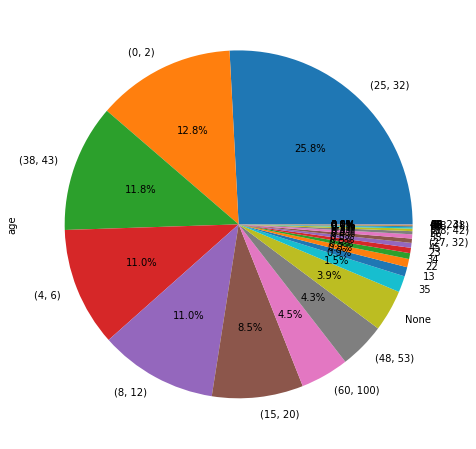

In [ ]:
#pie_graph
plt.figure(1, figsize=(8,8))
total_data.age.value_counts().plot.pie(autopct="%1.1f%%")
plt.show()

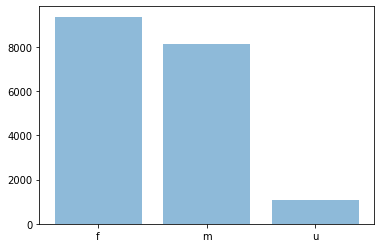

In [ ]:
#bar chart
gender = ['f','m','u']
plt.bar(gender, total_data.gender.value_counts(), align='center', alpha=0.5)
plt.show()

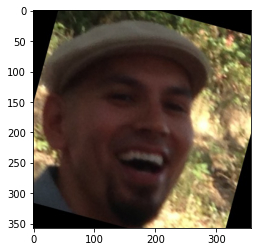

In [ ]:
path = "AdienceBenchmarkGenderAndAgeClassification/faces/"+total_data.user_id.loc[0]+"/coarse_tilt_aligned_face."+str(total_data.face_id.loc[0])+"."+total_data.original_image.loc[0]
img = load_img(path)
plt.imshow(img)
plt.show()

In [ ]:
total_data.gender.value_counts()

f    9372
m    8120
u    1099
Name: gender, dtype: int64

In [ ]:
total_data.age.value_counts()

(25, 32)     5004
(0, 2)       2488
(38, 43)     2293
(4, 6)       2140
(8, 12)      2124
(15, 20)     1642
(60, 100)     872
(48, 53)      830
None          748
35            293
13            168
22            149
34            105
23             96
45             88
(27, 32)       77
55             76
36             56
(38, 42)       46
57             24
3              18
29             11
(38, 48)        6
58              5
2               3
32              3
56              2
46              1
42              1
(8, 23)         1
Name: age, dtype: int64

In [ ]:
df = total_data[['age', 'gender', 'x', 'y', 'dx', 'dy']].copy()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19370 entries, 0 to 19369
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   age     19370 non-null  object
 1   gender  18591 non-null  object
 2   x       19370 non-null  int64 
 3   y       19370 non-null  int64 
 4   dx      19370 non-null  int64 
 5   dy      19370 non-null  int64 
dtypes: int64(4), object(2)
memory usage: 908.1+ KB


In [ ]:
img_path = []
for row in total_data.iterrows():
    path = "AdienceBenchmarkGenderAndAgeClassification/faces/"+row[1].user_id+"/coarse_tilt_aligned_face."+str(row[1].face_id)+"."+row[1].original_image
    img_path.append(path)

df['img_path'] = img_path

In [ ]:
df.head()

,age,gender,x,y,dx,dy,img_path
0,"(25, 32)",m,1102,296,357,357,AdienceBenchmarkGenderAndAgeClassification/fac...
1,"(25, 32)",f,1713,580,325,325,AdienceBenchmarkGenderAndAgeClassification/fac...
2,"(15, 20)",f,1437,664,306,306,AdienceBenchmarkGenderAndAgeClassification/fac...
3,"(25, 32)",f,978,229,803,803,AdienceBenchmarkGenderAndAgeClassification/fac...
4,"(25, 32)",m,1745,910,242,242,AdienceBenchmarkGenderAndAgeClassification/fac...


In [ ]:
print(df)

            age gender  ...    dy                                           img_path
0      (25, 32)      m  ...   357  AdienceBenchmarkGenderAndAgeClassification/fac...
1      (25, 32)      f  ...   325  AdienceBenchmarkGenderAndAgeClassification/fac...
2      (15, 20)      f  ...   306  AdienceBenchmarkGenderAndAgeClassification/fac...
3      (25, 32)      f  ...   803  AdienceBenchmarkGenderAndAgeClassification/fac...
4      (25, 32)      m  ...   242  AdienceBenchmarkGenderAndAgeClassification/fac...
...         ...    ...  ...   ...                                                ...
19365      None    NaN  ...  1473  AdienceBenchmarkGenderAndAgeClassification/fac...
19366      None    NaN  ...   331  AdienceBenchmarkGenderAndAgeClassification/fac...
19367      None    NaN  ...   293  AdienceBenchmarkGenderAndAgeClassification/fac...
19368      None    NaN  ...   408  AdienceBenchmarkGenderAndAgeClassification/fac...
19369      None    NaN  ...   772  AdienceBenchmarkGenderAndAgeCl

In [ ]:
age_mapping = [('(0, 2)', '0-2'), ('2', '0-2'), ('3', '0-2'), ('(4, 6)', '4-6'), ('(8, 12)', '8-13'), ('13', '8-13'), ('22', '15-20'), ('(8, 23)','15-20'), ('23', '25-32'), ('(15, 20)', '15-20'), ('(25, 32)', '25-32'), ('(27, 32)', '25-32'), ('32', '25-32'), ('34', '25-32'), ('29', '25-32'), ('(38, 42)', '38-43'), ('35', '38-43'), ('36', '38-43'), ('42', '48-53'), ('45', '38-43'), ('(38, 43)', '38-43'), ('(38, 42)', '38-43'), ('(38, 48)', '48-53'), ('46', '48-53'), ('(48, 53)', '48-53'), ('55', '48-53'), ('56', '48-53'), ('(60, 100)', '60+'), ('57', '60+'), ('58', '60+')]

age_mapping_dict = {each[0]: each[1] for each in age_mapping}
drop_labels = []
for idx, each in enumerate(df.age):
    if each == 'None':
        drop_labels.append(idx)
    else:
        df.age.loc[idx] = age_mapping_dict[each]

df = df.drop(labels=drop_labels, axis=0) #droped None values
df.age.value_counts(dropna=False)

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


25-32    5296
38-43    2776
0-2      2509
8-13     2292
4-6      2140
15-20    1792
48-53     916
60+       901
Name: age, dtype: int64

In [ ]:
print(age_mapping_dict)

{'(0, 2)': '0-2', '2': '0-2', '3': '0-2', '(4, 6)': '4-6', '(8, 12)': '8-13', '13': '8-13', '22': '15-20', '(8, 23)': '15-20', '23': '25-32', '(15, 20)': '15-20', '(25, 32)': '25-32', '(27, 32)': '25-32', '32': '25-32', '34': '25-32', '29': '25-32', '(38, 42)': '38-43', '35': '38-43', '36': '38-43', '42': '48-53', '45': '38-43', '(38, 43)': '38-43', '(38, 48)': '48-53', '46': '48-53', '(48, 53)': '48-53', '55': '48-53', '56': '48-53', '(60, 100)': '60+', '57': '60+', '58': '60+'}


In [ ]:
df = df.dropna()
unbiased_data = df[df.gender != 'u'].copy()
unbiased_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17452 entries, 0 to 19345
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   age       17452 non-null  object
 1   gender    17452 non-null  object
 2   x         17452 non-null  int64 
 3   y         17452 non-null  int64 
 4   dx        17452 non-null  int64 
 5   dy        17452 non-null  int64 
 6   img_path  17452 non-null  object
dtypes: int64(4), object(3)
memory usage: 1.1+ MB


In [ ]:
gender_to_label_map = {
    'f' : 0,
    'm' : 1
}

age_to_label_map = {
    '0-2'  :0,
    '4-6'  :1,
    '8-13' :2,
    '15-20':3,
    '25-32':4,
    '38-43':5,
    '48-53':6,
    '60+'  :7
}

# label_to_age_map = {value: key for key, value in age_to_label_map.items()}
# label_to_gender_map = {value: key for key, value in gender_to_label_map.items()}

unbiased_data['age'] = unbiased_data['age'].apply(lambda age: age_to_label_map[age])
unbiased_data['gender'] = unbiased_data['gender'].apply(lambda g: gender_to_label_map[g])

unbiased_data.head()

,age,gender,x,y,dx,dy,img_path
0,4,1,1102,296,357,357,AdienceBenchmarkGenderAndAgeClassification/fac...
1,4,0,1713,580,325,325,AdienceBenchmarkGenderAndAgeClassification/fac...
2,3,0,1437,664,306,306,AdienceBenchmarkGenderAndAgeClassification/fac...
3,4,0,978,229,803,803,AdienceBenchmarkGenderAndAgeClassification/fac...
4,4,1,1745,910,242,242,AdienceBenchmarkGenderAndAgeClassification/fac...


## Gender-Only model

In [ ]:
X = unbiased_data[['img_path']]
y = unbiased_data[['gender']]
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

print('Train data shape {}'.format(X_train.shape))
print('Test data shape {}'.format(X_test.shape))

Train data shape (12216, 1)
Test data shape (5236, 1)


In [ ]:
train_images = []
test_images = []

for row in X_train.iterrows():
    image = Image.open(row[1].img_path)
    image = image.resize((227, 227))   # Resize the image
    data = np.asarray(image)
    train_images.append(data)

for row in X_test.iterrows():
    image = Image.open(row[1].img_path)
    image = image.resize((227, 227))  # Resize the image
    data = np.asarray(image)
    test_images.append(data)

train_images = np.asarray(train_images)
test_images = np.asarray(test_images)

print('Train images shape {}'.format(train_images.shape))
print('Test images shape {}'.format(test_images.shape))

Train images shape (12216, 227, 227, 3)
Test images shape (5236, 227, 227, 3)


In [ ]:
model = Sequential()
model.add(Conv2D(input_shape=(227, 227, 3), filters=96, kernel_size=(7, 7), strides=4, padding='valid', activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2),strides=(2,2)))
model.add(BatchNormalization())
model.add(Conv2D(filters=256, kernel_size=(5, 5), strides=1, padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2),strides=(2,2)))
model.add(BatchNormalization())
model.add(Conv2D(filters=256, kernel_size=(3, 3), strides=1, padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2),strides=(2,2)))
model.add(BatchNormalization())

model.add(Flatten())
model.add(Dense(units=512, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(rate=0.25))
model.add(Dense(units=2, activation='softmax'))

In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 56, 56, 96)        14208     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 28, 28, 96)        0         
_________________________________________________________________
batch_normalization_4 (Batch (None, 28, 28, 96)        384       
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 28, 28, 256)       614656    
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 14, 14, 256)       0         
_________________________________________________________________
batch_normalization_5 (Batch (None, 14, 14, 256)       1024      
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 14, 14, 256)      

In [ ]:
callback = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=3) # Callback for earlystopping
model.compile(optimizer='adam', loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), metrics=['accuracy'])
history = model.fit(train_images, y_train, batch_size=32, epochs=15, validation_data=(test_images, y_test), callbacks=[callback])

Epoch 1/15


/usr/local/lib/python3.7/dist-packages/keras/backend.py:4907: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  '"`sparse_categorical_crossentropy` received `from_logits=True`, but '


381/382 [============================>.] - ETA: 0s - loss: 0.7016 - accuracy: 0.6818

/usr/local/lib/python3.7/dist-packages/keras/backend.py:4907: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  '"`sparse_categorical_crossentropy` received `from_logits=True`, but '


382/382 [==============================] - 11s 26ms/step - loss: 0.7012 - accuracy: 0.6820 - val_loss: 0.6015 - val_accuracy: 0.7017
Epoch 2/15
382/382 [==============================] - 9s 24ms/step - loss: 0.4938 - accuracy: 0.7625 - val_loss: 0.4706 - val_accuracy: 0.7767
Epoch 3/15
382/382 [==============================] - 9s 24ms/step - loss: 0.4063 - accuracy: 0.8125 - val_loss: 0.4643 - val_accuracy: 0.7762
Epoch 4/15
382/382 [==============================] - 9s 24ms/step - loss: 0.3501 - accuracy: 0.8459 - val_loss: 0.3583 - val_accuracy: 0.8396
Epoch 5/15
382/382 [==============================] - 9s 24ms/step - loss: 0.2911 - accuracy: 0.8721 - val_loss: 0.5012 - val_accuracy: 0.7903
Epoch 6/15
382/382 [==============================] - 9s 23ms/step - loss: 0.2494 - accuracy: 0.8971 - val_loss: 0.3498 - val_accuracy: 0.8602
Epoch 7/15
382/382 [==============================] - 9s 24ms/step - loss: 0.2127 - accuracy: 0.9136 - val_loss: 0.4565 - val_accuracy: 0.8340
Epoch 8/1

In [ ]:
model.save('gender_model2.h5')

In [ ]:
test_loss, test_acc = model.evaluate(test_images, y_test, verbose=2)
print(test_acc)

164/164 - 1s - loss: 0.8525 - accuracy: 0.7416
0.7415966391563416


In [ ]:
print(history.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


## Age-only Model

In [ ]:
X = unbiased_data[['img_path']]
y = unbiased_data[['age']]
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

print('Train data shape {}'.format(X_train.shape))
print('Test data shape {}'.format(X_test.shape))

Train data shape (12216, 1)
Test data shape (5236, 1)


In [ ]:
train_images = []
test_images = []

for row in X_train.iterrows():
    image = Image.open(row[1].img_path)
    image = image.resize((227, 227))   # Resize the image
    data = np.asarray(image)
    train_images.append(data)

for row in X_test.iterrows():
    image = Image.open(row[1].img_path)
    image = image.resize((227, 227))  # Resize the image
    data = np.asarray(image)
    test_images.append(data)

train_images = np.asarray(train_images)
test_images = np.asarray(test_images)

print('Train images shape {}'.format(train_images.shape))
print('Test images shape {}'.format(test_images.shape))

Train images shape (12216, 227, 227, 3)
Test images shape (5236, 227, 227, 3)


In [ ]:
model = Sequential()
model.add(Conv2D(input_shape=(227, 227, 3), filters=96, kernel_size=(7, 7), strides=4, padding='valid', activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2),strides=(2,2)))
model.add(BatchNormalization())
model.add(Conv2D(filters=256, kernel_size=(5, 5), strides=1, padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2),strides=(2,2)))
model.add(BatchNormalization())
model.add(Conv2D(filters=256, kernel_size=(3, 3), strides=1, padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2),strides=(2,2)))
model.add(BatchNormalization())

model.add(Flatten())
model.add(Dense(units=512, activation='relu'))
model.add(Dropout(rate=0.25))
model.add(BatchNormalization())
model.add(Dense(units=8, activation='softmax'))

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 56, 56, 96)        14208     
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 28, 28, 96)        0         
_________________________________________________________________
batch_normalization (BatchNo (None, 28, 28, 96)        384       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 28, 28, 256)       614656    
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 14, 14, 256)       0         
_________________________________________________________________
batch_normalization_1 (Batch (None, 14, 14, 256)       1024      
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 14, 14, 256)       5

In [ ]:
callback = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=3) # Callback for earlystopping
model.compile(optimizer='adam', loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), metrics=['accuracy'])
history = model.fit(train_images, y_train, batch_size=32, epochs=25, validation_data=(test_images, y_test), callbacks=[callback])

Epoch 1/25


/usr/local/lib/python3.7/dist-packages/keras/backend.py:4907: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  '"`sparse_categorical_crossentropy` received `from_logits=True`, but '


382/382 [==============================] - ETA: 0s - loss: 2.0077 - accuracy: 0.3051

/usr/local/lib/python3.7/dist-packages/keras/backend.py:4907: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  '"`sparse_categorical_crossentropy` received `from_logits=True`, but '


382/382 [==============================] - 42s 27ms/step - loss: 2.0077 - accuracy: 0.3051 - val_loss: 1.6297 - val_accuracy: 0.3995
Epoch 2/25
382/382 [==============================] - 9s 23ms/step - loss: 1.5673 - accuracy: 0.4173 - val_loss: 1.5335 - val_accuracy: 0.3984
Epoch 3/25
382/382 [==============================] - 9s 23ms/step - loss: 1.3166 - accuracy: 0.5081 - val_loss: 1.4926 - val_accuracy: 0.4662
Epoch 4/25
382/382 [==============================] - 9s 23ms/step - loss: 1.1236 - accuracy: 0.5821 - val_loss: 1.3654 - val_accuracy: 0.4832
Epoch 5/25
382/382 [==============================] - 9s 23ms/step - loss: 0.9586 - accuracy: 0.6450 - val_loss: 1.4106 - val_accuracy: 0.5141
Epoch 6/25
382/382 [==============================] - 9s 23ms/step - loss: 0.8092 - accuracy: 0.7053 - val_loss: 1.3715 - val_accuracy: 0.5506
Epoch 7/25
382/382 [==============================] - 9s 23ms/step - loss: 0.6823 - accuracy: 0.7489 - val_loss: 1.3810 - val_accuracy: 0.5602
Epoch 8/2

In [ ]:
model.save('age_model2.h5')

In [ ]:
test_loss, test_acc = model.evaluate(test_images, y_test, verbose=2)
print(test_acc)

164/164 - 1s - loss: 1.6356 - accuracy: 0.6429
0.6428571343421936
